# **DSL 25-1 Mathematics for ML 과제_Coding Problem**

### 기수 : 13기
### 이름 : 이승현

In [6]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필수 라이브러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import timeit

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD가 어떻게 사진을 압축하는데에 사용될 수 있는지 확인하고, 임의의 사진에 이를 활용할 경우 그 용량이 실제로 줄어드는지, 정보는 어느정도 유지가 되는지 직접 체험해보겠습니다.

(TMI: 예시 사진 출처 = **12기 김민규** 일본 여행 사진)

경로 설정 (image.jpg 경로로 바꿔주세요.)

In [3]:
path_to_image = "image.png"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

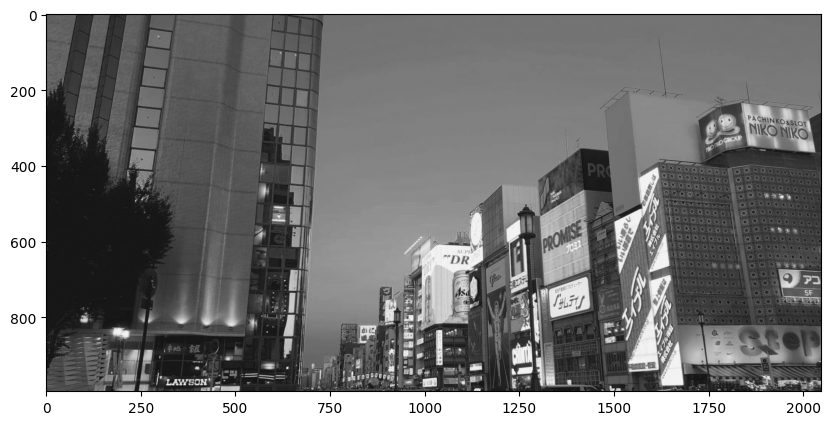

In [8]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (10, 13))
plt.imshow(image, cmap = 'gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [9]:
image_float = image.astype(np.float32)

이제 np.linalg.svd를 활용해 SVD를 해보겠습니다.
여기서 np.linalg.svd 의 아웃풋으로는 총 $U$, 시그마 값, $V^\top$ 세 값이 나오게 되며, 시그마 값을 활용해 대각 원소로 그 값들을 가지는 대각 행렬을 만들겠습니다.

In [10]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(996, 2048)


 여기서부터는 해당 이미지에 대한 고유벡터로 특이값 내림차순 정렬 기준 상위 $70$ 개만 사용하겠습니다. (행렬의 나머지 원소들은 $0$으로 지정)

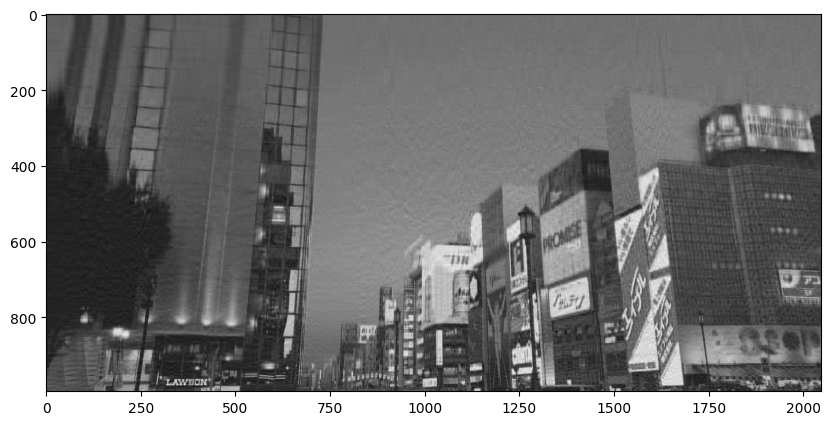

In [11]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해졌으나 육안으로 그림의 정보는 여전히 확인이 가능합니다! 그렇다면 해당 사진과 이전 사진과 비교해 용량이 줄어들었는지, 관련하여 처리 속도의 개선 여부까지도 살펴보겠습니다.

In [12]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  5187316  Non-zero Elements
Image Composition uses  213150  Non-zero Elements
Processing Time for 10 Full Images: 21.31115 seconds
Processing Time for 10 Compressed Images: 0.65723 seconds


즉, SVD를 활용하면 더 적은 용량으로 원본의 정보를 충분히 살릴 수 있어 효율적으로 사용할 수 있음을 알 수 있습니다.

이제, 여러분의 사진을 이용해 이러한 과정을 다시 반복해 볼 차례입니다.

**위의 셀들을 활용해 여러분의 사진으로 SVD를 시도해보세요. 사용하는 고유벡터의 수를 조절하며 사진의 선명도와 처리 속도를 비교해보고 그 과정과 결과를 아래에 제시해주세요.**

In [13]:
path_to_image2 = "image2.jpg"

In [14]:
image2 = cv2.imread(path_to_image2, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize = (8, 6))
plt.imshow(image2, cmap = 'gray')

In [15]:
image_float2 = image2.astype(np.float32)

U2, Sigma2, Vt2 = np.linalg.svd(image_float2)
Sigma_mat2 = np.zeros((image_float2.shape[0], image_float2.shape[1]))
np.fill_diagonal(Sigma_mat2, Sigma2)

# 시그마 행렬 확인 용도
print(Sigma_mat2.shape)

(4032, 3024)


In [18]:
image_composition2 = np.matmul(U2[:, :50], np.matmul(Sigma_mat2[:50, :50], Vt2[:50, :]))
fig2 = plt.figure(figsize=(8, 6))

plt.imshow(image_composition2, cmap = 'gray')

In [19]:
def count_nonzero_full_image():
    return np.count_nonzero(U2) + np.count_nonzero(Sigma_mat2) + np.count_nonzero(Vt2)

def count_nonzero_compressed_image():
    return np.count_nonzero(U2[:, :50]) + np.count_nonzero(Sigma_mat2[:50, :50]) + np.count_nonzero(Vt2[:50, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10):
    full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
    compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U2) + np.count_nonzero(Sigma_mat2) + np.count_nonzero(Vt2), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U2[:, :50]) + np.count_nonzero(Sigma_mat2[:50, :50]) + np.count_nonzero(Vt2[:50, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  25404624  Non-zero Elements
Image Composition uses  352850  Non-zero Elements
Processing Time for 10 Full Images: 104.7486 seconds
Processing Time for 10 Compressed Images: 1.15851 seconds


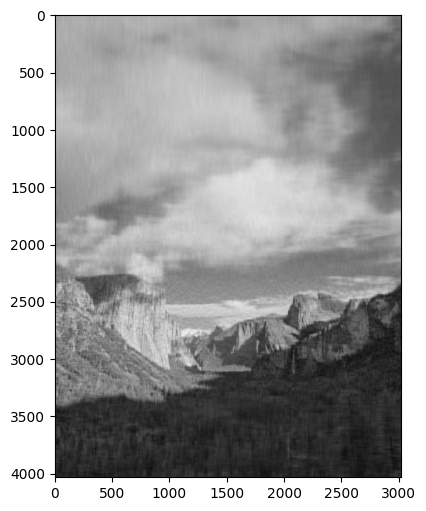

In [21]:
image_composition_2_30 = np.matmul(U2[:, :30], np.matmul(Sigma_mat2[:30, :30], Vt2[:30, :]))
fig2 = plt.figure(figsize=(8, 6))

plt.imshow(image_composition2, cmap = 'gray')

In [22]:
def count_nonzero_full_image():
    return np.count_nonzero(U2) + np.count_nonzero(Sigma_mat2) + np.count_nonzero(Vt2)

def count_nonzero_compressed_image():
    return np.count_nonzero(U2[:, :30]) + np.count_nonzero(Sigma_mat2[:30, :30]) + np.count_nonzero(Vt2[:30, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10):
    full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
    compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U2) + np.count_nonzero(Sigma_mat2) + np.count_nonzero(Vt2), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U2[:, :30]) + np.count_nonzero(Sigma_mat2[:30, :30]) + np.count_nonzero(Vt2[:30, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  25404624  Non-zero Elements
Image Composition uses  211710  Non-zero Elements
Processing Time for 10 Full Images: 105.08516 seconds
Processing Time for 10 Compressed Images: 0.72119 seconds


SVD를 활용하여 이미지를 압축했을 때 Non-zero element 수가 감소하였고 처리 시간 역시 줄어들어 더욱 효율적인 것을 알 수 있었다. 고유벡터 개수를 30개로 줄였을 때 처리 시간은 더욱 감소하였고, 대신 이미지가 조금 더 흐릿해졌지만 여전히 원본 이미지의 대상을 식별할 수 있는 정도였다.